                                                                                          ********** Oumayma El Mabrouk ********** 


# 1. Uploading the needed library and data 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

plt.style.use('seaborn')

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [15]:
# Importing libraries in Python
import sklearn.datasets as datasets


# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

name=["target"]
tg=iris.target
y=pd.DataFrame(tg, columns=name)
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


In [4]:
df.columns 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

#  2. visulizing Data

50 50 50


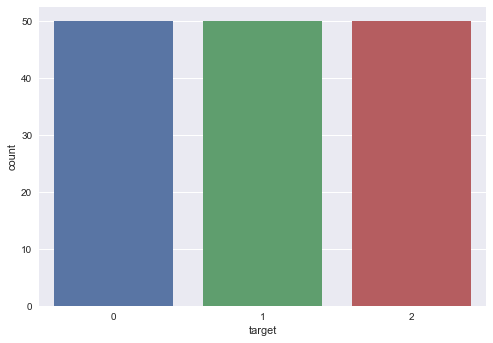

In [5]:
ax=sns.countplot(y.target, label='count')
irisVE, irisVI, irisSE= y.value_counts()
print(irisVE, irisVI, irisSE )

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###  Visualizing Standardized Data with Seaborn

(array([0, 1, 2]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)')])

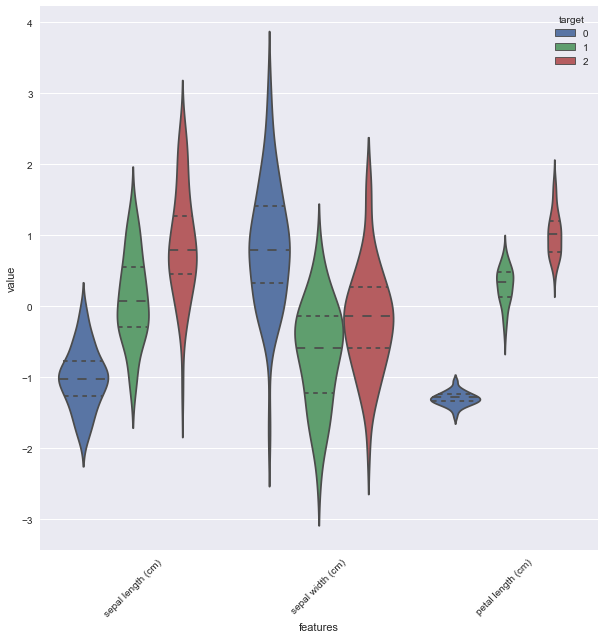

In [7]:
data = df
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc [:, 0:3]], axis=1)
data = pd.melt(data, id_vars='target',
              var_name='features',
              value_name='value')

plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='value', hue='target', data=data, inner='quart')
plt.xticks(rotation=45)  

(array([0, 1, 2]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)')])

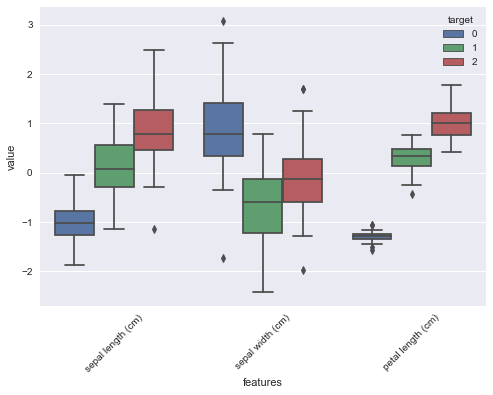

In [8]:
sns.boxplot(x='features', y='value', hue='target', data=data)
plt.xticks(rotation=45)

### Joint Plots for Feature Comparison

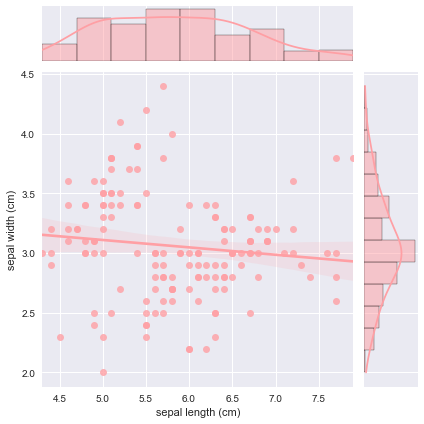

In [9]:
sns.jointplot(df.loc[ : , 'sepal length (cm)'],
            df.loc[ : , 'sepal width (cm)'],
            kind='reg',
            color='#ff9fa4' )

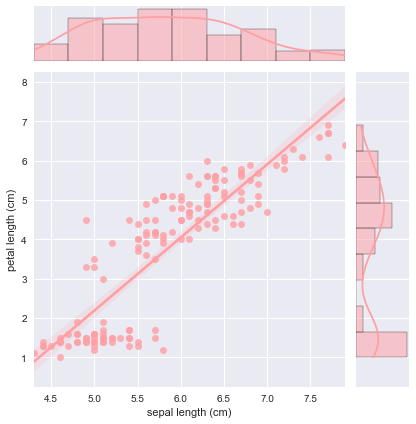

In [10]:
sns.jointplot(df.loc[ : , 'sepal length (cm)'],
            df.loc[ : , 'petal length (cm)'],
            kind='reg',
            color='#ff9fa4' )

### Observing the Distribution of Values and their Variance with Swarm Plots

(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

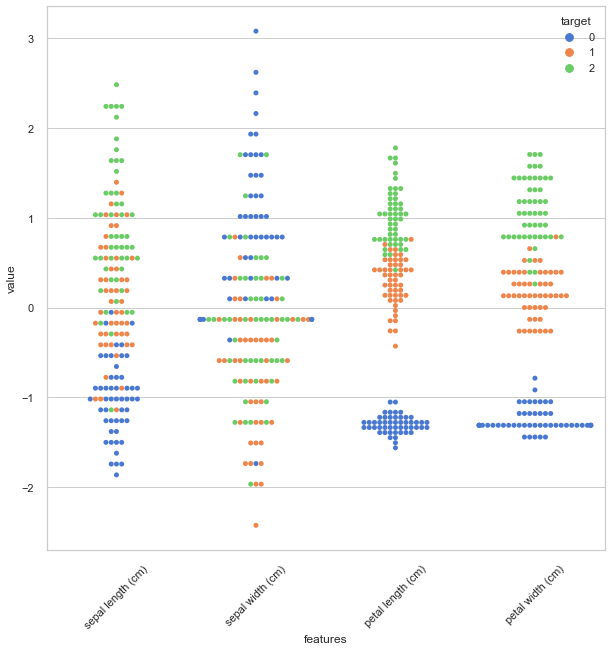

In [11]:
sns.set(style='whitegrid', palette='muted')
data = df
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc [:, 0:4]], axis=1)

data = pd.melt(data, id_vars='target',
              var_name='features',
              value_name='value')

plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='value', hue='target', data=data)
plt.xticks(rotation=45)  

### Observing all Pair-wise Correlations

<AxesSubplot:>

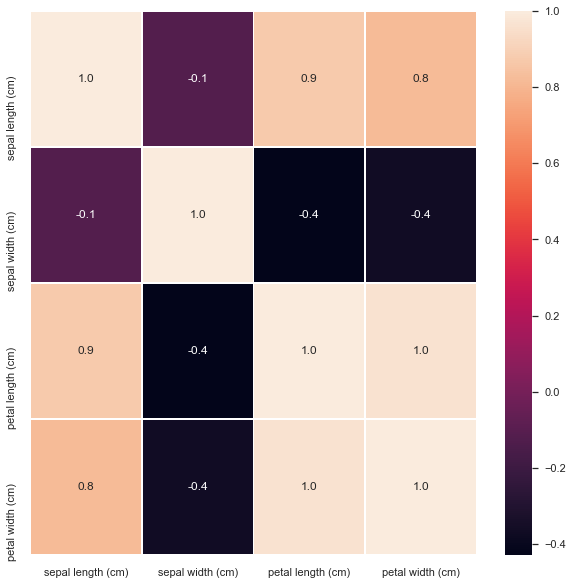

In [12]:
f, ax= plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), annot = True, linewidth= .5, fmt='.1f', ax=ax)

# 4. define the Decision Tree Algorithm

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42) 

In [17]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# 5. Visualize the graph

In [22]:

!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=85384095d120ec8dd1fb99156b297effb1bb88bd30c53f8208cda2980dc01bb9
  Stored in directory: c:\users\mb\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [24]:
!pip install graphviz

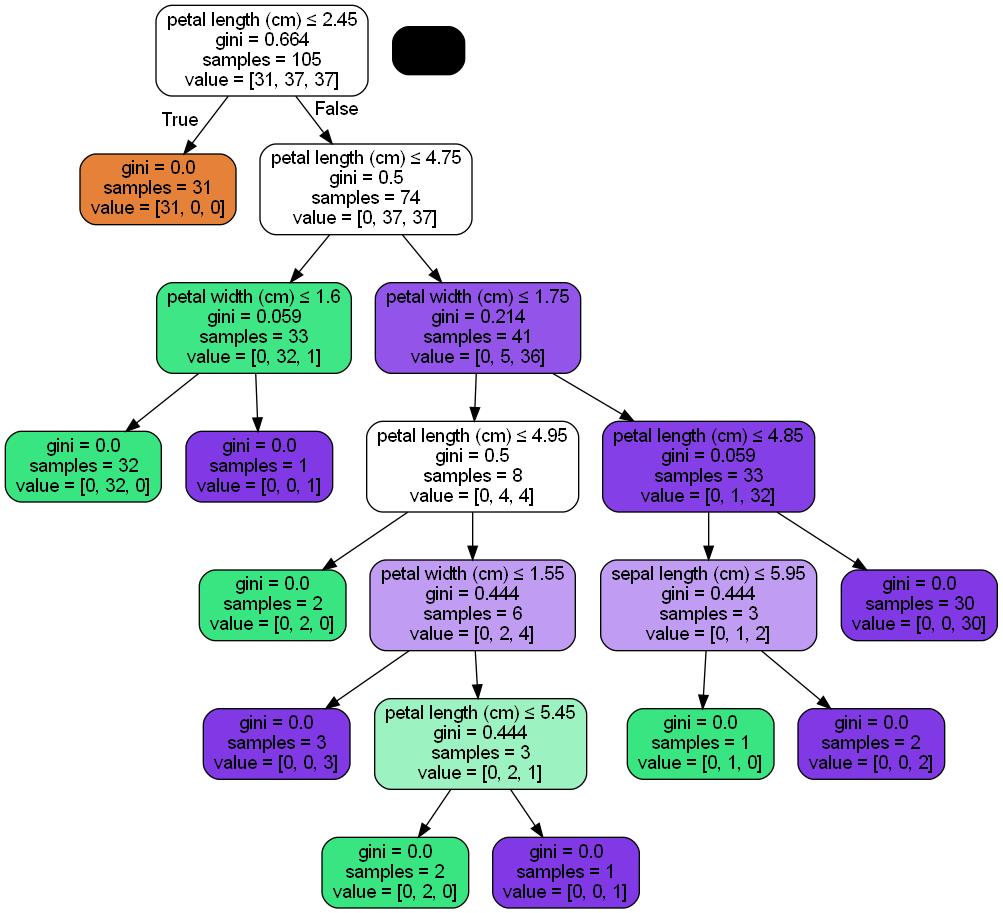

In [26]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())